In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 15 ##

## Probability ##

In [2]:
# Discussion Question (a):
# P(Rick and Morty both appear)


In [3]:
# Discussion Question (b)
# P(neither Rick nor Morty appears)


## Random Sampling ##

In [4]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [5]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [6]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [7]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


In [8]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
884,6/7/15,3,SAN,1
1884,6/13/15,1247,BOS,2
2884,6/20/15,325,BOS,-1
3884,6/26/15,1635,DEN,-1
4884,7/3/15,1447,DEN,31
5884,7/10/15,1092,LAS,-2
6884,7/17/15,73,HNL,33
7884,7/23/15,1257,ANC,2
8884,7/30/15,330,AUS,-7
9884,8/5/15,1263,MCO,9


## Distributions ##

In [9]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [10]:
die.sample(10)

Face
4
5
4
6
6
3
5
3
3
4


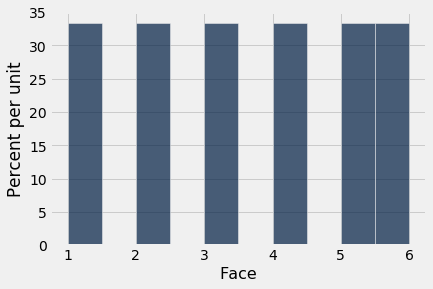

In [11]:
die.hist()

In [12]:
roll_bins = np.arange(0.5, 6.6, 1)

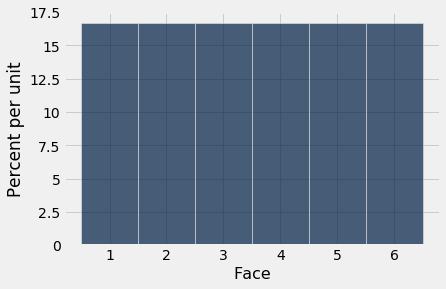

In [13]:
die.hist(bins=roll_bins)

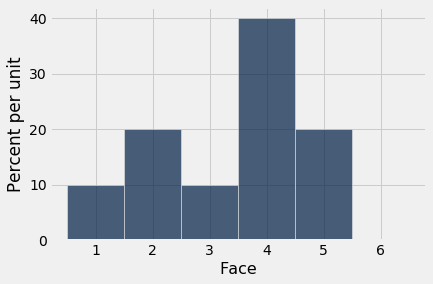

In [14]:
die.sample(10).hist(bins=roll_bins)

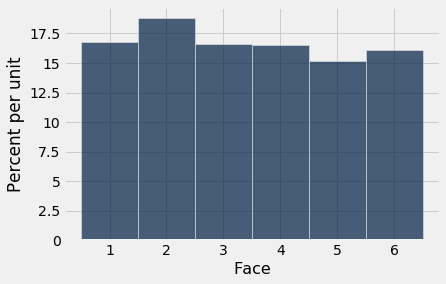

In [15]:
die.sample(1000).hist(bins=roll_bins)

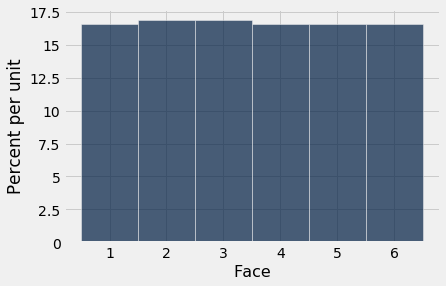

In [16]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples ##

In [17]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


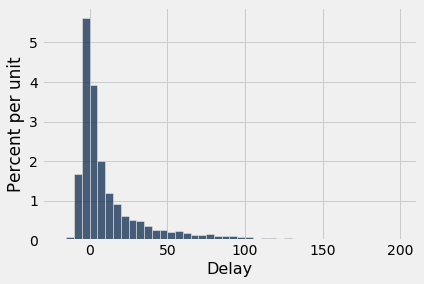

In [18]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [19]:
min(united.column('Delay'))

-16

In [20]:
max(united.column('Delay'))

580

In [21]:
np.average(united.column('Delay'))

16.658155515370705

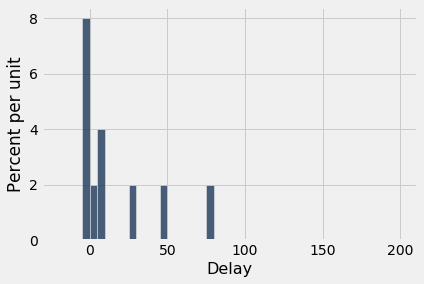

In [22]:
united.sample(10).hist('Delay', bins = united_bins)

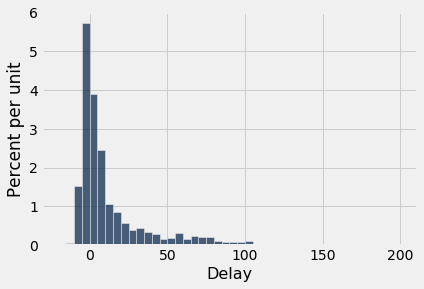

In [23]:
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

In [24]:
np.median(united.column('Delay'))

2.0

In [25]:
np.median(united.sample(10).column('Delay'))

-1.5

In [26]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [27]:
sample_median(10)

2.0

In [28]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

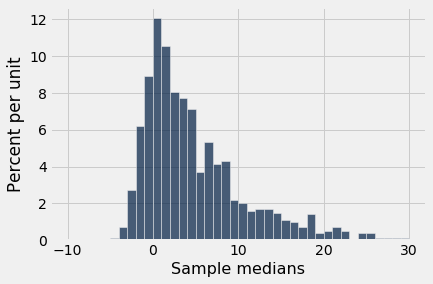

In [29]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [30]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

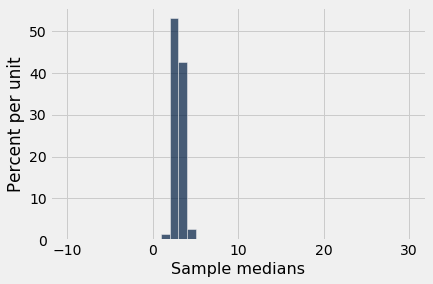

In [32]:
Table().with_column(
    'Sample medians', sample_medians).hist(bins = np.arange(-10,31))